In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/giovanni-lunetta/stat_3255/stat_3255_final/presentation':
  os.chdir(r'/Users/giovanni-lunetta/stat_3255/stat_3255_final/presentation')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/importlib/_bootstrap.py": 1648071155.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/importlib/_bootstrap_external.py": 1648071155.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/codecs.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/encodings/aliases.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/encodings/__init__.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/encodings/utf_8.py": 1648071155.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/abc.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/io.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/stat.py": 1648071154.0, "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/_collections_abc.py": 1648071154.0,

/var/folders/4b/z0w6x5_n59g_x_9s3qnbx_p80000gn/T/ipykernel_66414/3881126822.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
#| echo: true

import pandas as pd
import numpy as np

df = pd.read_csv("/Users/giovanni-lunetta/stat_3255/stat_3255_final/data/311_Service_Requests_from_2010_to_Present.csv")

df.drop(['Unique Key', 'Location', 'Agency Name'], axis=1, inplace=True)
df.drop(['Bridge Highway Segment', 'Road Ramp', 'Bridge Highway Direction', 'Bridge Highway Name', 'Taxi Pick Up Location', 'Taxi Company Borough', 'Vehicle Type', 'Due Date', 'Facility Type'], axis=1, inplace=True)
df.drop(['Zip Codes', 'Community Districts', 'Borough Boundaries', 'City Council Districts'], axis=1, inplace=True)
df.drop(['Street Name', 'BBL', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'Status', 'Community Board', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Park Borough'], axis=1, inplace=True)
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)

/var/folders/4b/z0w6x5_n59g_x_9s3qnbx_p80000gn/T/ipykernel_66414/3258711592.py:4: DtypeWarning:

Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
#| echo: true

df.describe()

,Incident Zip,Latitude,Longitude,Police Precincts
count,230247.000000,231674.000000,231674.000000,231638.000000
mean,10808.752175,40.735881,-73.924741,41.243164
std,535.351717,0.087520,0.076771,20.439052
min,10000.000000,40.498949,-74.252766,1.000000
25%,10451.000000,40.669770,-73.967920,26.000000
50%,11201.000000,40.730215,-73.927349,40.000000
75%,11232.000000,40.817920,-73.879641,60.000000
max,12345.000000,40.912468,-73.700736,77.000000


In [4]:
#| echo: true

count_low = df[df['Incident Zip'] <= 10000.000000]['Incident Zip'].count()
count_high = df[df['Incident Zip'] >= 11697]['Incident Zip'].count()
print(count_low)
print(count_high)

df.drop(df[df['Incident Zip'] <= 10000.000000].index, inplace=True)
df.drop(df[df['Incident Zip'] >= 11697].index, inplace=True)

71
8


In [5]:
#| echo: true

# fill null values with 'Other'
df['Location Type'] = df['Location Type'].fillna('Other')

# change all 'Other (Explain Below)' to 'Other' because they are the same thing
df['Location Type'] = df['Location Type'].replace('Other (Explain Below)', 'Other')

# fill null values with 'Other'
df['Descriptor'] = df['Descriptor'].fillna('Other')

# change all versions of other to uniform 'Other'
df['Descriptor'] = df['Descriptor'].replace({'Other (Explain Below)': 'Other',
                                             'Other (complaint details)': 'Other',
                                             'Other/Unknown': 'Other'})

df["Address Type"].value_counts(dropna=False)

# fill null values with 'UNRECOGNIZED'
df['Address Type'] = df['Address Type'].fillna('UNRECOGNIZED')

df['Park Facility Name'] = df['Park Facility Name'].fillna('Unspecified')

df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [6]:
#| echo: true
#| 
df['Resolution Action Updated Date'] = pd.to_datetime(df['Resolution Action Updated Date'])
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'], errors='coerce')

In [7]:
#| echo: true

# Check if there are any instances where the "Closed Date" is earlier than the "Created Date"
closed_earlier = df[df['Closed Date'] < df['Created Date']]

if closed_earlier.empty:
    print("No instances where 'Closed Date' is earlier than 'Created Date'")
else:
    print("There are instances where 'Closed Date' is earlier than 'Created Date'")

# creates an index containing all of examples where closed date is before created data and drops those columns
index_to_drop = df.index[df['Closed Date'] < df['Created Date']].tolist()
df.drop(index_to_drop, inplace=True)

There are instances where 'Closed Date' is earlier than 'Created Date'


In [8]:
#| echo: true

df['duration'] = df['Closed Date'] - df['Created Date']

# convert the resulting timedelta object to a numerical value in seconds
df['duration_seconds'] = df['duration'].dt.total_seconds()

df['duration_hours'] = df['duration'].dt.total_seconds() / 3600

df['duration_days'] = df['duration'].dt.days

# Create two new columns - one for the day of the week and one for the type of day (weekday/weekend):
df['day_of_week'] = df['Created Date'].dt.dayofweek
df['day_type'] = np.where(df['day_of_week'] < 5, 'weekday', 'weekend')

df['duration_hours'] = df['duration_hours'].fillna(168)

In [9]:
#| echo: true
#| eval: false

from uszipcode import SearchEngine
import pandas as pd

sr = SearchEngine()

borough_zipcodes = {
    'Bronx': [str(zipcode) for zipcode in range(10451, 10476)],
    'Brooklyn': [str(zipcode) for zipcode in range(11201, 11257)],
    'Manhattan': [str(zipcode) for zipcode in range(10001, 10283)],
    'Queens': [str(zipcode) for zipcode in range(11004, 11110)] + [str(zipcode) for zipcode in range(11351, 11698)],
    'Staten Island': [str(zipcode) for zipcode in range(10301, 10315)]
}

zip_info_list = []

for borough, zipcodes in borough_zipcodes.items():
    for zipcode in zipcodes:
        zip_info = sr.by_zipcode(zipcode)
        if zip_info is not None:
            zip_info_dict = zip_info.__dict__
            zip_info_dict['borough'] = borough
            zip_info_list.append(zip_info_dict)

df1 = pd.DataFrame(zip_info_list)

df1.to_csv('zip_codes.csv')

In [10]:
#| echo: true

df_zip = pd.read_csv("/Users/giovanni-lunetta/stat_3255/stat_3255_final/data/zip_codes.csv")
df_zip.drop(['Unnamed: 0', '_sa_instance_state', 'lat', 'water_area_in_sqmi', 'bounds_east', 'zipcode_type', 'lng', 'bounds_north', 'common_city_list', 'county', 'bounds_west', 'state', 'land_area_in_sqmi', 'borough', 'timezone', 'bounds_south', 'major_city', 'radius_in_miles', 'post_office_city', 'area_code_list'], axis=1, inplace=True)

In [11]:
#| echo: true

df = df[df['Borough'] != 'unspecified']

# Replace all strings containing 'noise' with 'Noise'
df['Complaint Type'] = df['Complaint Type'].str.replace(r'.*noise.*', 'noise', regex=True)

counts = df['Descriptor'].value_counts()
to_remove = counts[counts < 10].index
df = df[~df['Descriptor'].isin(to_remove)]

counts2 = df['Complaint Type'].value_counts()
to_remove2 = counts2[counts2 < 10].index
df = df[~df['Complaint Type'].isin(to_remove2)]

In [12]:
#| echo: true
#| eval: false

df.to_csv('/Users/giovanni-lunetta/stat_3255/stat_3255_final/data/cleaned.csv', index=False)

In [13]:
#| echo: true

df = pd.read_csv('/Users/giovanni-lunetta/stat_3255/stat_3255_final/data/cleaned.csv')
df.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Complaint Type', 'Descriptor',
       'Location Type', 'Incident Zip', 'Incident Address', 'Address Type',
       'City', 'Resolution Description', 'Resolution Action Updated Date',
       'Borough', 'Open Data Channel Type', 'Park Facility Name', 'Latitude',
       'Longitude', 'Police Precincts', 'duration', 'duration_seconds',
       'duration_hours', 'duration_days', 'day_of_week', 'day_type',
       'housing_units', 'occupied_housing_units', 'median_home_value',
       'population', 'median_household_income', 'population_density'],
      dtype='object')

In [14]:
#| echo: true
#| eval: false

# Get the top 20 'Complaint Type' for each 'Borough'
borough_complaint_counts = df.groupby(['Borough', 'Complaint Type']).size().reset_index(name='Count')
for borough in borough_complaint_counts['Borough'].unique():
    top_20 = borough_complaint_counts[borough_complaint_counts['Borough'] == borough].nlargest(20, 'Count')
    print('Top 20 Complaint Types in', borough)
    print(top_20)
    print('\n')

In [15]:
#| echo: false
#| eval: true

# Get the top 20 'Complaint Type' for each 'Borough'
borough_complaint_counts = df.groupby(['Borough', 'Complaint Type']).size().reset_index(name='Count')
for borough in borough_complaint_counts['Borough'].unique():
    top_20 = borough_complaint_counts[borough_complaint_counts['Borough'] == borough].nlargest(20, 'Count')
    print('Top 20 Complaint Types in', borough)
    print(top_20)
    print('\n')

Top 20 Complaint Types in bronx
    Borough          Complaint Type  Count
47    bronx          heat/hot water  11729
68    bronx                   noise   7653
52    bronx         illegal parking   6144
103   bronx    unsanitary condition   2947
11    bronx        blocked driveway   2113
77    bronx                plumbing   2000
75    bronx           paint/plaster   1734
27    bronx             door/window   1327
109   bronx              water leak   1085
1     bronx       abandoned vehicle    867
25    bronx       derelict vehicles    864
32    bronx                electric    749
42    bronx                 general    736
93    bronx  street light condition    731
37    bronx         flooring/stairs    699
6     bronx               appliance    627
92    bronx        street condition    537
34    bronx                elevator    513
26    bronx         dirty condition    497
80    bronx                  rodent    482


Top 20 Complaint Types in brooklyn
      Borough               

In [16]:
#| echo: true
#| eval: false

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

boroughs = df['Borough'].unique()

# Get the top 20 complaint types for each borough
top_20_complaints = {}
for borough in df['Borough'].unique():
    borough_df = df[df['Borough'] == borough]
    complaint_counts = borough_df['Complaint Type'].value_counts()
    top_20 = complaint_counts.nlargest(20).index.tolist()
    top_20_complaints[borough] = top_20

# Create a contingency table for each borough and top 20 complaint type:
for borough in df['Borough'].unique():
    borough_df = df[df['Borough'] == borough]
    top_20 = top_20_complaints[borough]
    borough_df = borough_df[borough_df['Complaint Type'].isin(top_20)]
    contingency_table = pd.crosstab(borough_df['Complaint Type'], borough_df['Borough'])
    
    # Visualize the contingency table as a heatmap:
    sns.heatmap(contingency_table, cmap="YlGnBu")
    plt.title(f'Contingency Table for {borough}')
    plt.xlabel('Borough')
    plt.ylabel('Complaint Type')
    plt.show()

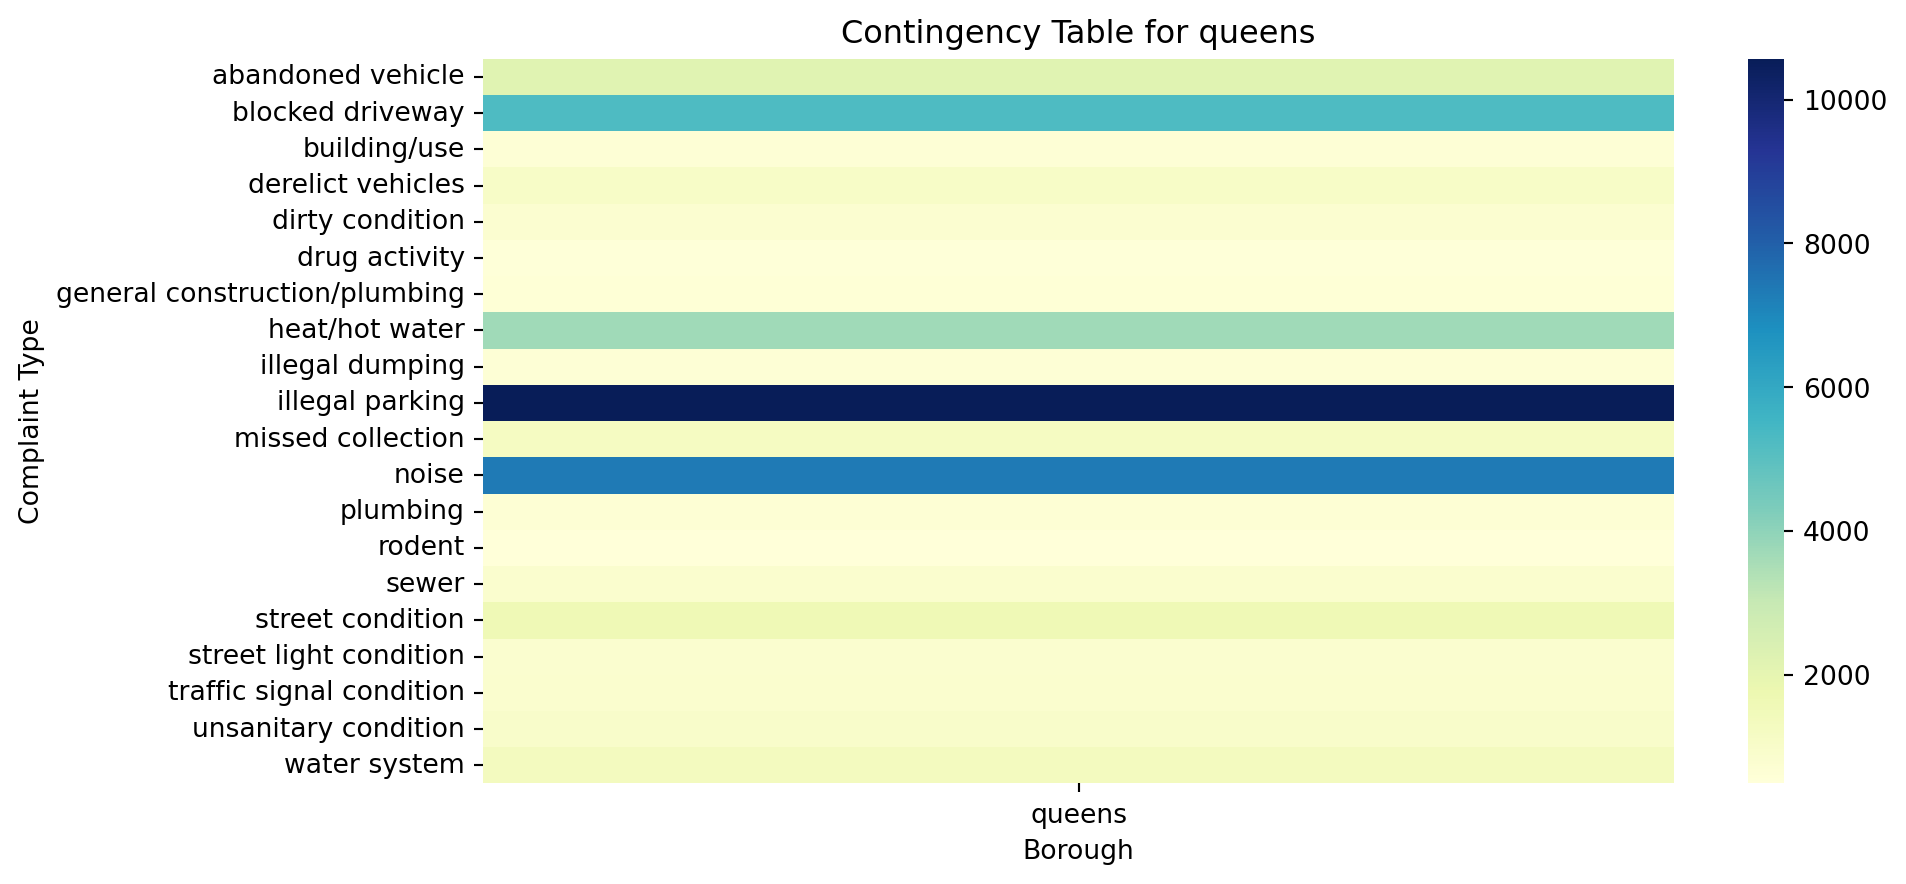

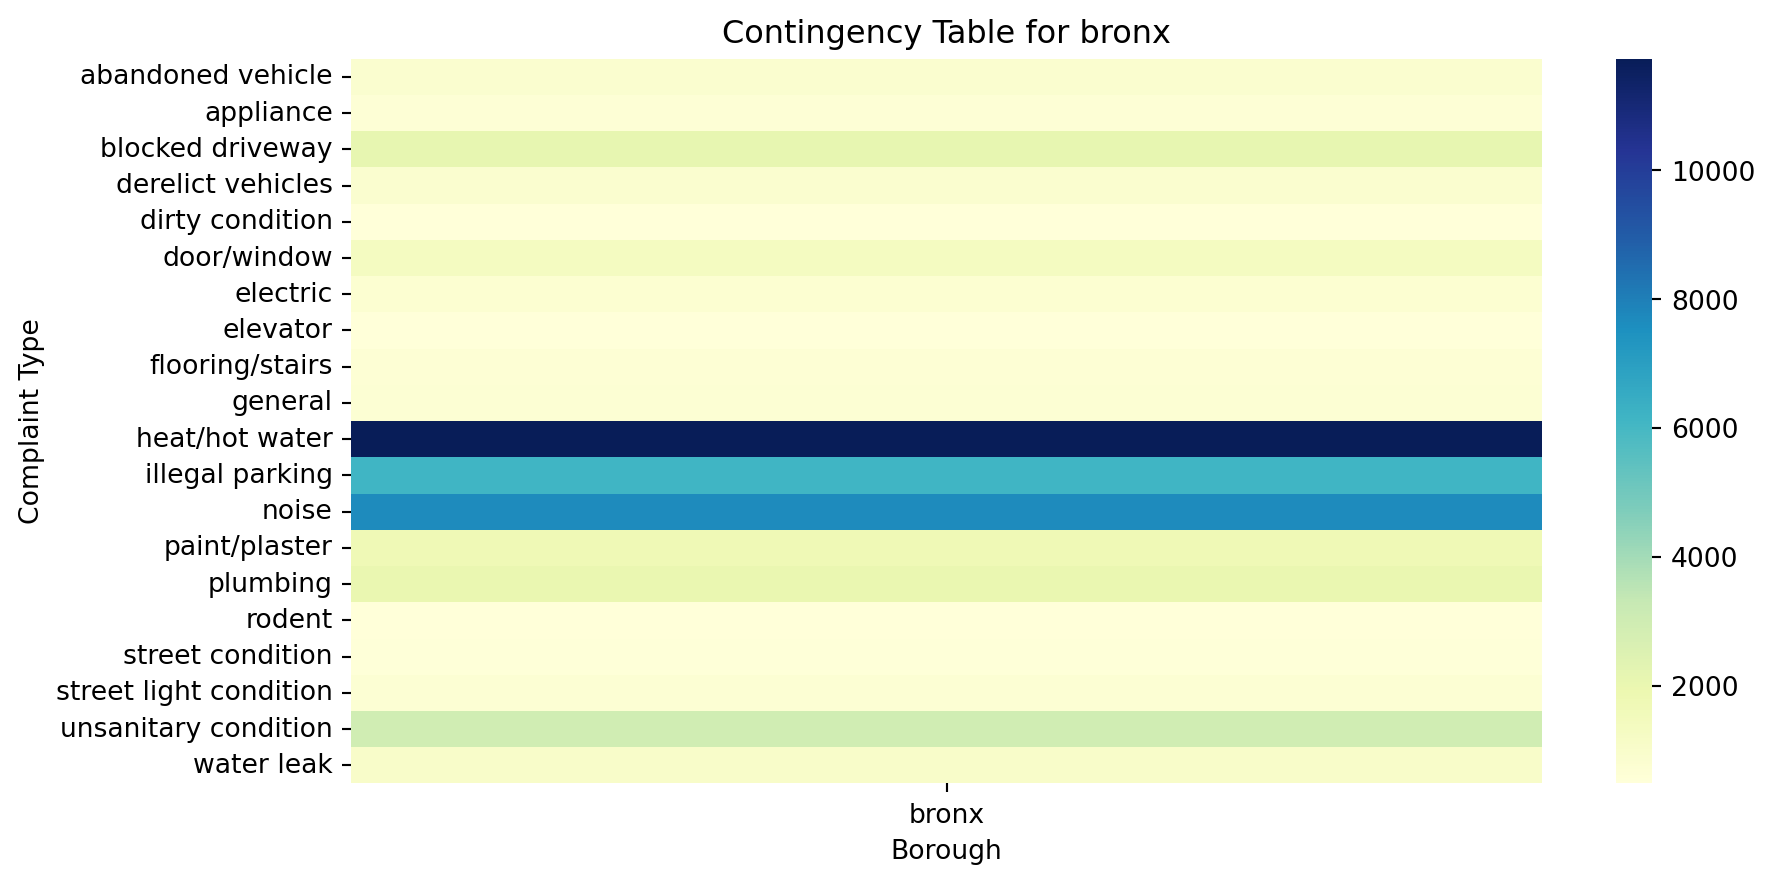

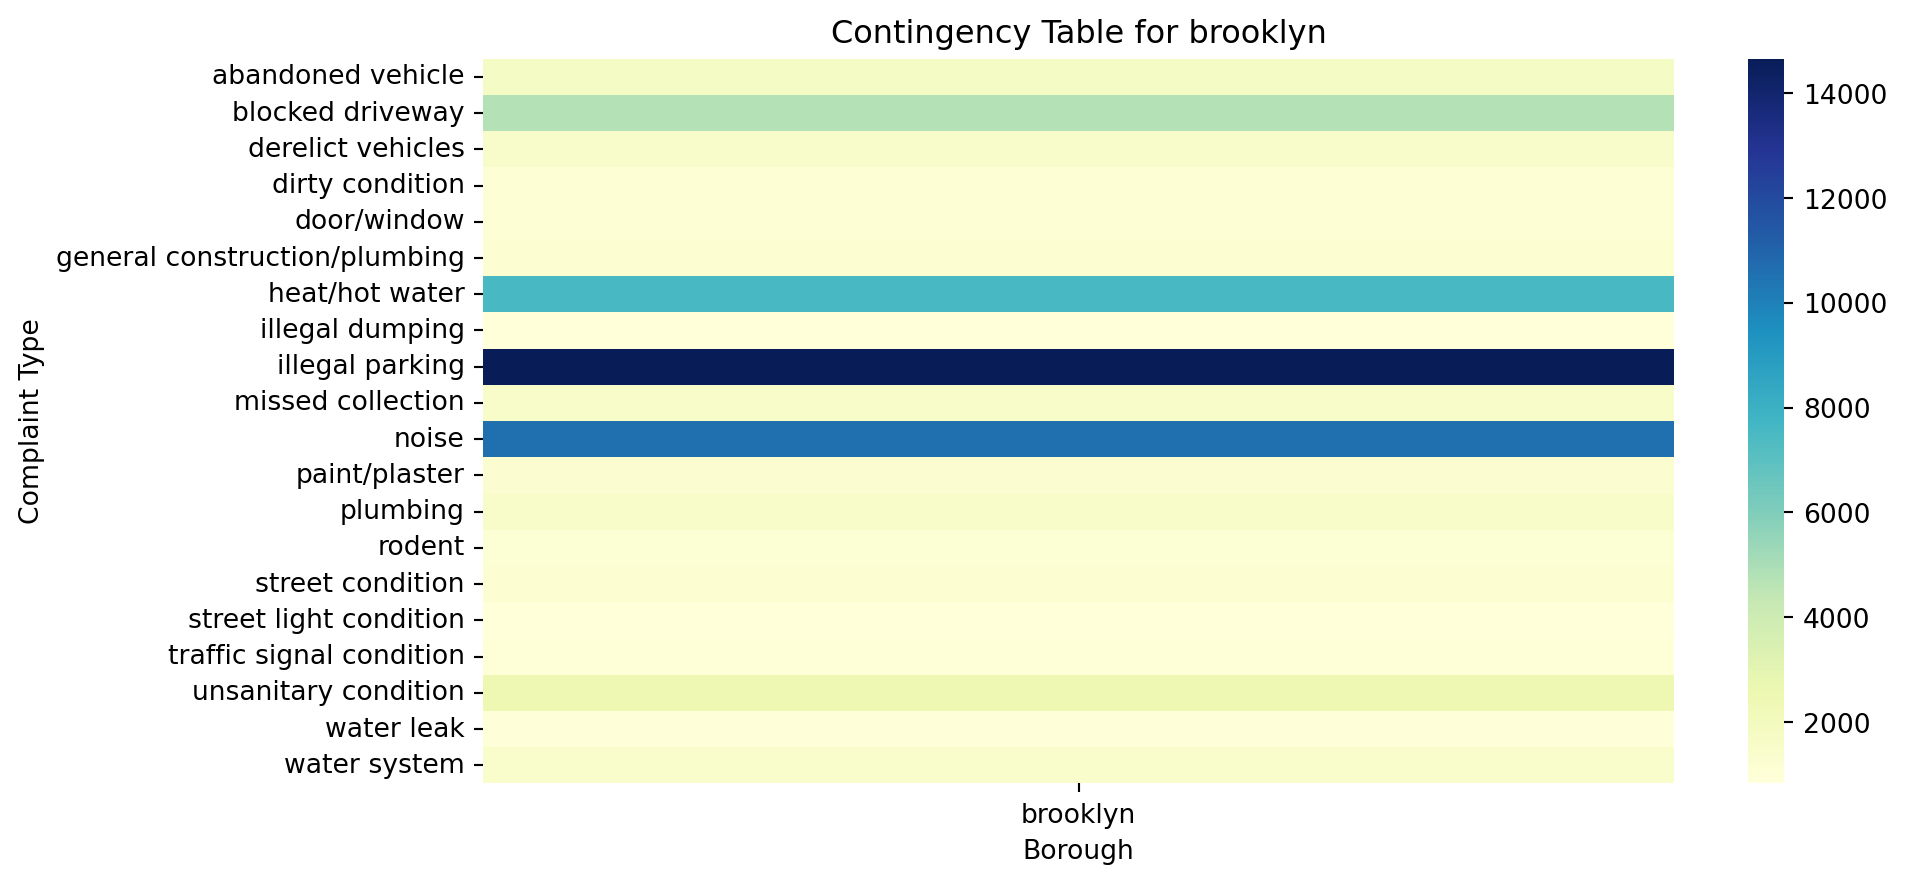

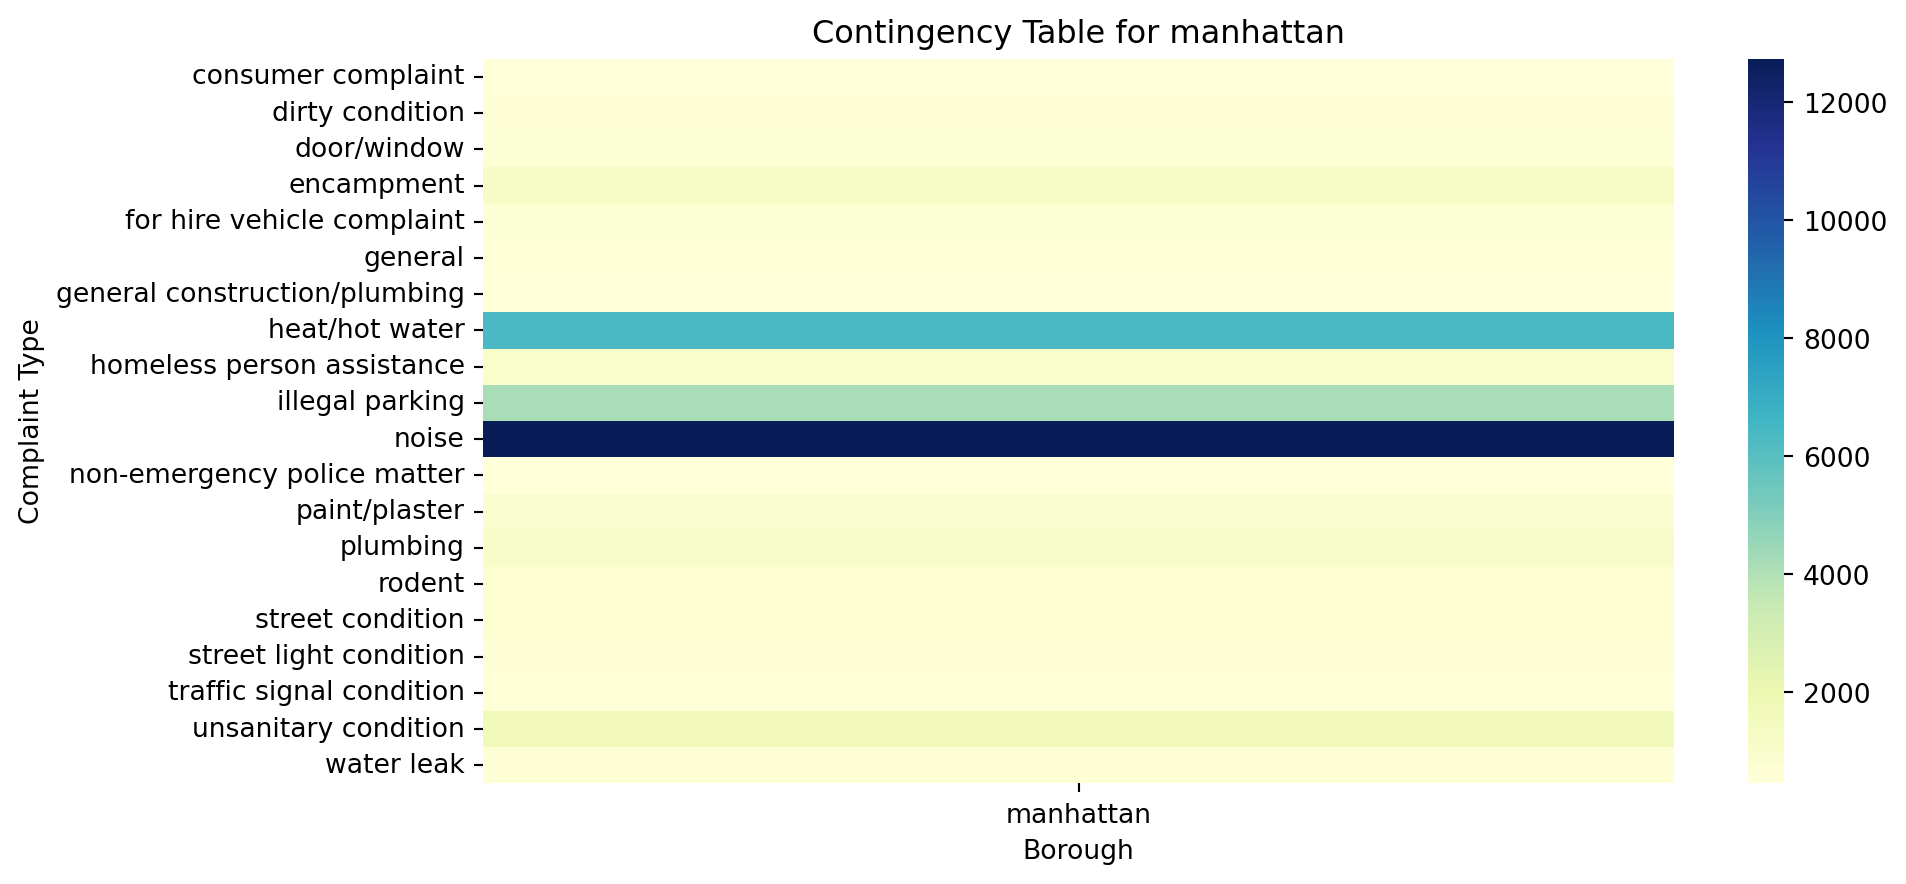

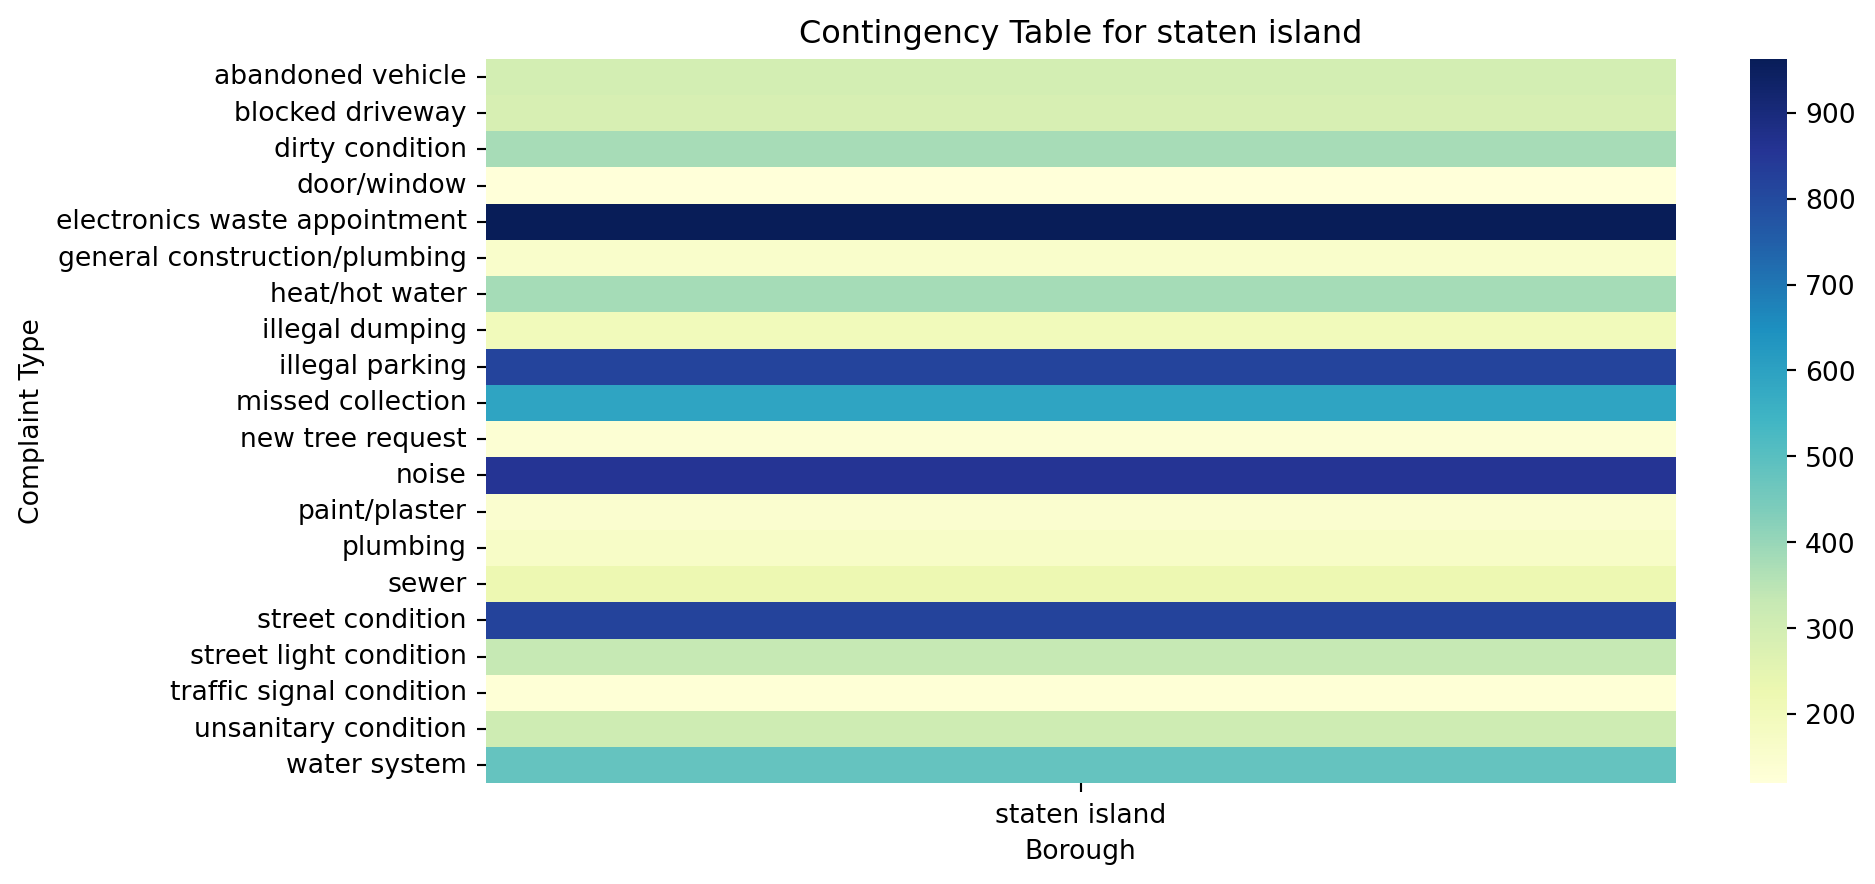

In [17]:
#| echo: false
#| eval: true

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

boroughs = df['Borough'].unique()

# Get the top 20 complaint types for each borough
top_20_complaints = {}
for borough in df['Borough'].unique():
    borough_df = df[df['Borough'] == borough]
    complaint_counts = borough_df['Complaint Type'].value_counts()
    top_20 = complaint_counts.nlargest(20).index.tolist()
    top_20_complaints[borough] = top_20

# Create a contingency table for each borough and top 20 complaint type:
for borough in df['Borough'].unique():
    borough_df = df[df['Borough'] == borough]
    top_20 = top_20_complaints[borough]
    borough_df = borough_df[borough_df['Complaint Type'].isin(top_20)]
    contingency_table = pd.crosstab(borough_df['Complaint Type'], borough_df['Borough'])
    
    # Visualize the contingency table as a heatmap:
    sns.heatmap(contingency_table, cmap="YlGnBu")
    plt.title(f'Contingency Table for {borough}')
    plt.xlabel('Borough')
    plt.ylabel('Complaint Type')
    plt.show()

In [18]:
#| echo: true
#| eval: false

from scipy.stats import chi2_contingency

# Get the top 20 complaints
top_20_complaints = df['Complaint Type'].value_counts().nlargest(20).index

# Create a contingency table with the top 20 complaints on the left and boroughs as columns
contingency_table = pd.crosstab(df[df['Complaint Type'].isin(top_20_complaints)]['Complaint Type'],
                                df[df['Complaint Type'].isin(top_20_complaints)]['Borough'])

# Add a row for "Other" complaints
other_complaints = df[~df['Complaint Type'].isin(top_20_complaints)]
other_complaints_by_borough = pd.crosstab(other_complaints['Complaint Type'], other_complaints['Borough']).sum()
other_complaints_total = other_complaints_by_borough.sum()
other_complaints_by_borough['Total'] = other_complaints_total
contingency_table.loc['other'] = other_complaints_by_borough

# Add a total column to the contingency table
contingency_table['Total'] = contingency_table.sum(axis=1)

# Sort the contingency table by the total count of each complaint
contingency_table = contingency_table.loc[contingency_table['Total'].sort_values(ascending=False).index]

contingency_table

In [19]:
#| echo: false
#| eval: true

from scipy.stats import chi2_contingency

# Get the top 20 complaints
top_20_complaints = df['Complaint Type'].value_counts().nlargest(20).index

# Create a contingency table with the top 20 complaints on the left and boroughs as columns
contingency_table = pd.crosstab(df[df['Complaint Type'].isin(top_20_complaints)]['Complaint Type'],
                                df[df['Complaint Type'].isin(top_20_complaints)]['Borough'])

# Add a row for "Other" complaints
other_complaints = df[~df['Complaint Type'].isin(top_20_complaints)]
other_complaints_by_borough = pd.crosstab(other_complaints['Complaint Type'], other_complaints['Borough']).sum()
other_complaints_total = other_complaints_by_borough.sum()
other_complaints_by_borough['Total'] = other_complaints_total
contingency_table.loc['other'] = other_complaints_by_borough

# Add a total column to the contingency table
contingency_table['Total'] = contingency_table.sum(axis=1)

# Sort the contingency table by the total count of each complaint
contingency_table = contingency_table.loc[contingency_table['Total'].sort_values(ascending=False).index]

contingency_table

Borough,bronx,brooklyn,manhattan,queens,staten island,Total
Complaint Type,,,,,,
other,7344,13134,12488,10731,3244,46941
noise,7653,10571,12737,7372,856,39189
illegal parking,6144,14662,4182,10569,815,36372
heat/hot water,11729,7544,6366,3687,381,29707
blocked driveway,2113,4735,355,5286,287,12776
unsanitary condition,2947,2474,1680,994,311,8406
plumbing,2000,1563,1113,664,167,5507
abandoned vehicle,867,1792,201,2183,298,5341
street condition,537,1186,785,1621,819,4948


In [20]:
#| echo: true

# Perform the chi-squared test for the contingency table
chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1,:-1])

# Print the result
print(f'Chi-squared statistic: {chi2:.2f}, p-value: {p:.2e}\n')

Chi-squared statistic: 34175.24, p-value: 0.00e+00



In [21]:
#| echo: true
#| eval: false

from scipy.stats import kruskal

# create a list of data frames, one for each borough
borough_dfs = [df[df['Borough'] == b] for b in df['Borough'].unique()]

# create a dictionary to store the complaint types for each borough
complaint_types_by_borough = {}

# populate the dictionary with the complaint types for each borough
for df_borough in borough_dfs:
    borough_name = df_borough['Borough'].iloc[0]
    complaint_types = df_borough['Complaint Type'].unique()
    complaint_types_by_borough[borough_name] = complaint_types

# perform the Kruskal-Wallis test for each combination of boroughs
n_tests = len(complaint_types_by_borough) * (len(complaint_types_by_borough) - 1) // 2
alpha = 0.05 / n_tests
for borough1 in complaint_types_by_borough.keys():
    for borough2 in complaint_types_by_borough.keys():
        if borough1 != borough2:
            print(f'Kruskal-Wallis test for {borough1} vs {borough2}:')
            data1 = df[df['Borough'] == borough1]['Complaint Type']
            data2 = df[df['Borough'] == borough2]['Complaint Type']
            h, p = kruskal(data1, data2)
            if p < alpha:
                print(f'H-statistic: {h:.2f}, p-value: {p:.2e} (significant)\n')
            else:
                print(f'H-statistic: {h:.2f}, p-value: {p:.2e} (not significant)\n')

In [22]:
#| echo: false
#| eval: true

from scipy.stats import kruskal

# create a list of data frames, one for each borough
borough_dfs = [df[df['Borough'] == b] for b in df['Borough'].unique()]

# create a dictionary to store the complaint types for each borough
complaint_types_by_borough = {}

# populate the dictionary with the complaint types for each borough
for df_borough in borough_dfs:
    borough_name = df_borough['Borough'].iloc[0]
    complaint_types = df_borough['Complaint Type'].unique()
    complaint_types_by_borough[borough_name] = complaint_types

# perform the Kruskal-Wallis test for each combination of boroughs
n_tests = len(complaint_types_by_borough) * (len(complaint_types_by_borough) - 1) // 2
alpha = 0.05 / n_tests
for borough1 in complaint_types_by_borough.keys():
    for borough2 in complaint_types_by_borough.keys():
        if borough1 != borough2:
            print(f'Kruskal-Wallis test for {borough1} vs {borough2}:')
            data1 = df[df['Borough'] == borough1]['Complaint Type']
            data2 = df[df['Borough'] == borough2]['Complaint Type']
            h, p = kruskal(data1, data2)
            if p < alpha:
                print(f'H-statistic: {h:.2f}, p-value: {p:.2e} (significant)\n')
            else:
                print(f'H-statistic: {h:.2f}, p-value: {p:.2e} (not significant)\n')

Kruskal-Wallis test for queens vs bronx:


H-statistic: 89.51, p-value: 3.05e-21 (significant)

Kruskal-Wallis test for queens vs brooklyn:


H-statistic: 100.88, p-value: 9.77e-24 (significant)

Kruskal-Wallis test for queens vs manhattan:


H-statistic: 1097.64, p-value: 1.07e-240 (significant)

Kruskal-Wallis test for queens vs staten island:


H-statistic: 331.04, p-value: 5.71e-74 (significant)

Kruskal-Wallis test for bronx vs queens:


H-statistic: 89.51, p-value: 3.05e-21 (significant)

Kruskal-Wallis test for bronx vs brooklyn:


H-statistic: 0.66, p-value: 4.16e-01 (not significant)

Kruskal-Wallis test for bronx vs manhattan:


H-statistic: 482.94, p-value: 4.89e-107 (significant)

Kruskal-Wallis test for bronx vs staten island:


H-statistic: 85.21, p-value: 2.68e-20 (significant)

Kruskal-Wallis test for brooklyn vs queens:


H-statistic: 100.88, p-value: 9.77e-24 (significant)

Kruskal-Wallis test for brooklyn vs bronx:


H-statistic: 0.66, p-value: 4.16e-01 (not significant)

Kruskal-Wallis test for brooklyn vs manhattan:


H-statistic: 661.82, p-value: 6.01e-146 (significant)

Kruskal-Wallis test for brooklyn vs staten island:


H-statistic: 156.36, p-value: 7.07e-36 (significant)

Kruskal-Wallis test for manhattan vs queens:


H-statistic: 1097.64, p-value: 1.07e-240 (significant)

Kruskal-Wallis test for manhattan vs bronx:


H-statistic: 482.94, p-value: 4.89e-107 (significant)

Kruskal-Wallis test for manhattan vs brooklyn:


H-statistic: 661.82, p-value: 6.01e-146 (significant)

Kruskal-Wallis test for manhattan vs staten island:


H-statistic: 2.21, p-value: 1.37e-01 (not significant)

Kruskal-Wallis test for staten island vs queens:


H-statistic: 331.04, p-value: 5.71e-74 (significant)

Kruskal-Wallis test for staten island vs bronx:


H-statistic: 85.21, p-value: 2.68e-20 (significant)

Kruskal-Wallis test for staten island vs brooklyn:


H-statistic: 156.36, p-value: 7.07e-36 (significant)

Kruskal-Wallis test for staten island vs manhattan:


H-statistic: 2.21, p-value: 1.37e-01 (not significant)



In [23]:
#| echo: true
#| eval: false

from scipy.stats import chi2_contingency

# Get the top 20 complaints
top_20_complaints = df['Complaint Type'].value_counts().nlargest(20).index

# Create a dictionary to store the results
results = {}

# Loop through each complaint type and perform the chi-squared test
for complaint_type in top_20_complaints:
    # Create a contingency table for the complaint type
    contingency_table = pd.crosstab(df[df['Complaint Type'] == complaint_type]['Borough'],
                                    df[df['Complaint Type'] == complaint_type]['Complaint Type'])
    
    # Calculate the count of "Other" complaints for each borough
    other_complaints_by_borough = df[~df['Complaint Type'].isin([complaint_type])]['Borough'].value_counts()

    # Add a row for "Other" complaints
    other_complaints_total = other_complaints_by_borough.sum()
    other_complaints_by_borough['other'] = other_complaints_total
    contingency_table['other'] = other_complaints_by_borough
    
    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Store the results in the dictionary
    results[complaint_type] = {'Chi-squared statistic': chi2, 'p-value': p}

# Print the results
for complaint_type, result in results.items():
    print(f"Chi-squared test for {complaint_type}:")
    print(f"Chi-squared statistic: {result['Chi-squared statistic']:.2f}")
    print(f"p-value: {result['p-value']:.2e}\n")

In [24]:
#| echo: false
#| eval: true

from scipy.stats import chi2_contingency

# Get the top 20 complaints
top_20_complaints = df['Complaint Type'].value_counts().nlargest(20).index

# Create a dictionary to store the results
results = {}

# Loop through each complaint type and perform the chi-squared test
for complaint_type in top_20_complaints:
    # Create a contingency table for the complaint type
    contingency_table = pd.crosstab(df[df['Complaint Type'] == complaint_type]['Borough'],
                                    df[df['Complaint Type'] == complaint_type]['Complaint Type'])
    
    # Calculate the count of "Other" complaints for each borough
    other_complaints_by_borough = df[~df['Complaint Type'].isin([complaint_type])]['Borough'].value_counts()

    # Add a row for "Other" complaints
    other_complaints_total = other_complaints_by_borough.sum()
    other_complaints_by_borough['other'] = other_complaints_total
    contingency_table['other'] = other_complaints_by_borough
    
    # Perform the chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Store the results in the dictionary
    results[complaint_type] = {'Chi-squared statistic': chi2, 'p-value': p}

# Print the results
for complaint_type, result in results.items():
    print(f"Chi-squared test for {complaint_type}:")
    print(f"Chi-squared statistic: {result['Chi-squared statistic']:.2f}")
    print(f"p-value: {result['p-value']:.2e}\n")

Chi-squared test for noise:
Chi-squared statistic: 4691.93
p-value: 0.00e+00

Chi-squared test for illegal parking:
Chi-squared statistic: 4509.60
p-value: 0.00e+00

Chi-squared test for heat/hot water:
Chi-squared statistic: 7663.88
p-value: 0.00e+00

Chi-squared test for blocked driveway:
Chi-squared statistic: 4593.15
p-value: 0.00e+00

Chi-squared test for unsanitary condition:
Chi-squared statistic: 1184.53
p-value: 3.59e-255

Chi-squared test for plumbing:
Chi-squared statistic: 870.30
p-value: 4.54e-187

Chi-squared test for abandoned vehicle:
Chi-squared statistic: 1640.01
p-value: 0.00e+00

Chi-squared test for street condition:
Chi-squared statistic: 2357.99
p-value: 0.00e+00

Chi-squared test for paint/plaster:
Chi-squared statistic: 1017.49
p-value: 5.78e-219

Chi-squared test for missed collection:
Chi-squared statistic: 1758.82
p-value: 0.00e+00

Chi-squared test for water system:
Chi-squared statistic: 1247.52
p-value: 7.93e-269

Chi-squared test for derelict vehicles:
C

In [25]:
#| echo: true
#| eval: false

import folium
from folium.plugins import HeatMap

# Get the top 20 complaints
top_20_complaints = df['Complaint Type'].value_counts().nlargest(20).index

# create a new dataframe with the frequency of complaints by borough for the top 20 complaints
df_heatmap = df[df['Complaint Type'].isin(top_20_complaints)].groupby(['Borough', 'Complaint Type']).size().reset_index(name='Frequency')

# create a pivot table with the frequency of complaints for each borough and complaint type
heatmap_data = pd.pivot_table(df_heatmap, values='Frequency', index=['Borough'], columns=['Complaint Type'])

# create a list of colors for the heatmap
colors = ['yellow', 'orange', 'red', 'purple', 'blue', 'green']

# create a folium map centered on New York City
map_heatmap = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# create a heatmap layer for each complaint type
for i, c in enumerate(heatmap_data.columns):
    # sample the data to reduce the number of points on the map
    sample_size = int(len(df[df['Complaint Type'] == c]) * 0.01)
    df_sample = df[df['Complaint Type'] == c].sample(n=sample_size)
    heatmap_layer = HeatMap(list(zip(df_sample['Latitude'], df_sample['Longitude'])),
                            name=c,
                            min_opacity=0.5,
                            max_zoom=18,
                            radius=15,
                            blur=10,
                            gradient={0.4: colors[i%len(colors)-1], 0.65: colors[i%len(colors)-2], 1: colors[i%len(colors)-3]}
                           )
    heatmap_layer.add_to(map_heatmap)

# add a layer control to toggle between the different complaint types
folium.LayerControl().add_to(map_heatmap)

# save the map as an HTML file
map_heatmap.save('heatmap.html')

In [26]:
#| echo: true
#| eval: false

import folium
from folium.plugins import MarkerCluster

# Get the top 20 complaints
top_20_complaints = df['Complaint Type'].value_counts().nlargest(20).index

# Create a new dataframe with only the top 20 complaints
df_top_20_complaints = df[df['Complaint Type'].isin(top_20_complaints)]

# Create a folium map centered on New York City
map_complaints = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Create a MarkerCluster layer for each complaint type
for c in top_20_complaints:
    # Filter the dataframe to only include the current complaint type
    df_complaint = df_top_20_complaints[df_top_20_complaints['Complaint Type'] == c]
    
    # Create a MarkerCluster layer for the current complaint type
    mc = MarkerCluster(name=c)
    
    # Add a marker to the MarkerCluster layer for each complaint location
    for lat, lon, address in zip(df_complaint['Latitude'], df_complaint['Longitude'], df_complaint['Incident Address']):
        folium.Marker(location=[lat, lon], tooltip=address).add_to(mc)
    
    # Add the MarkerCluster layer to the map
    mc.add_to(map_complaints)

# Add a layer control to toggle between the different complaint types
folium.LayerControl().add_to(map_complaints)

# Display the map
map_complaints.save("top20_complaints_map.html")

In [27]:
#| echo: true
#| eval: false

import numpy as np
import seaborn as sns

# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# drop any rows with missing values
demographics = demographics.dropna()

# create barplots for each demographic variable
for var in demographics.columns[:-1]:  # exclude the last column (Borough)
    sns.barplot(x='Borough', y=var, data=demographics, estimator=np.median)
    plt.title(var)
    plt.show()

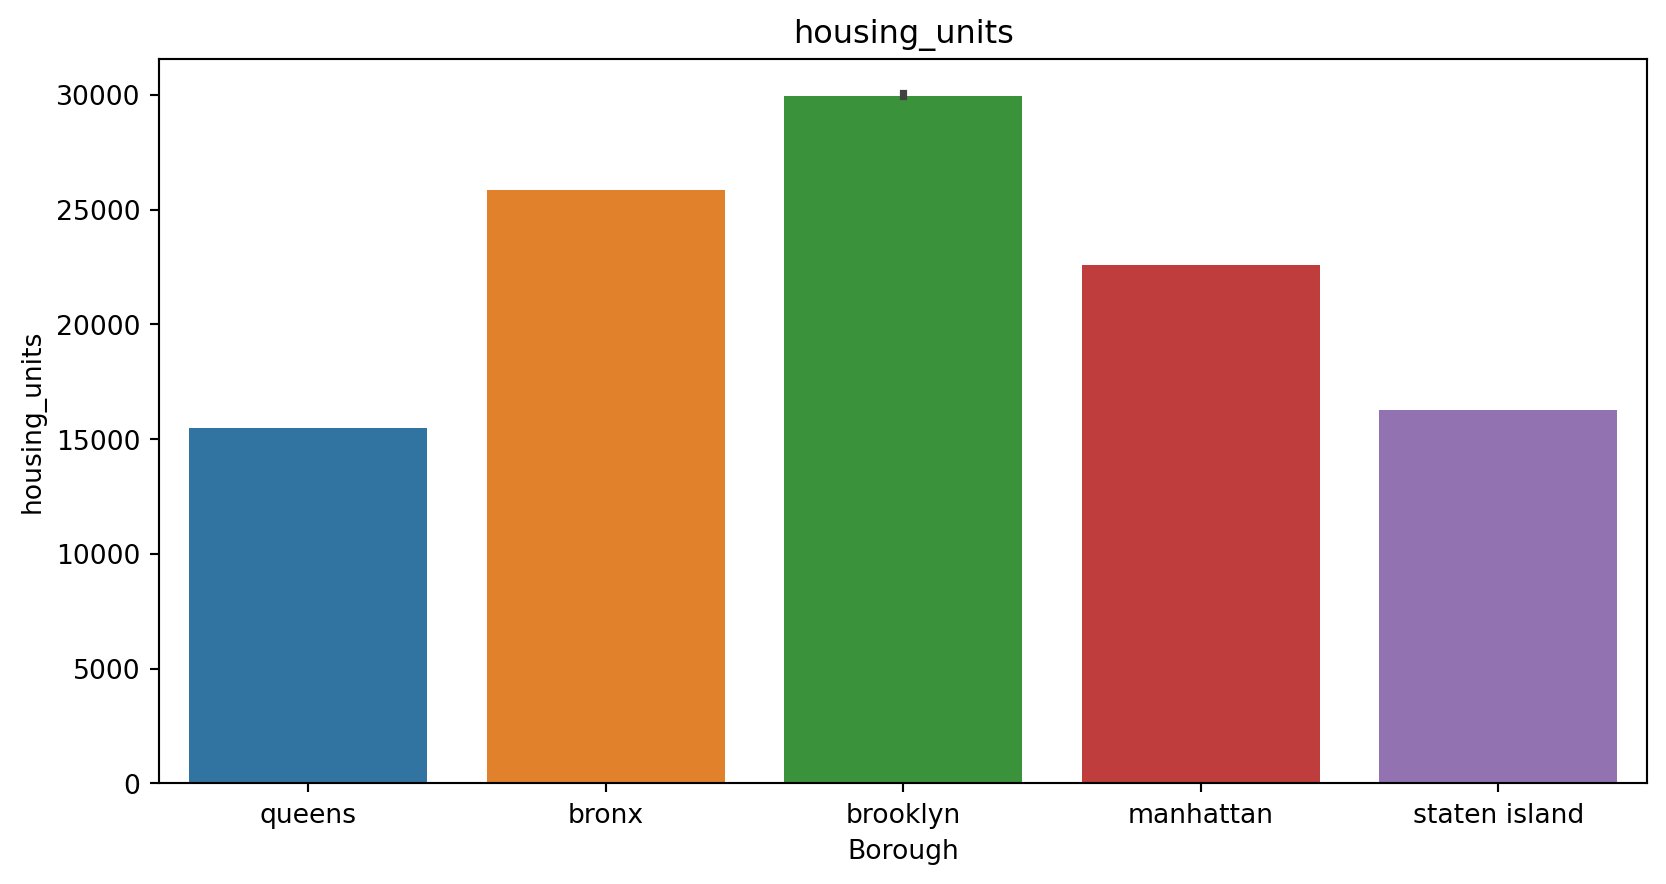

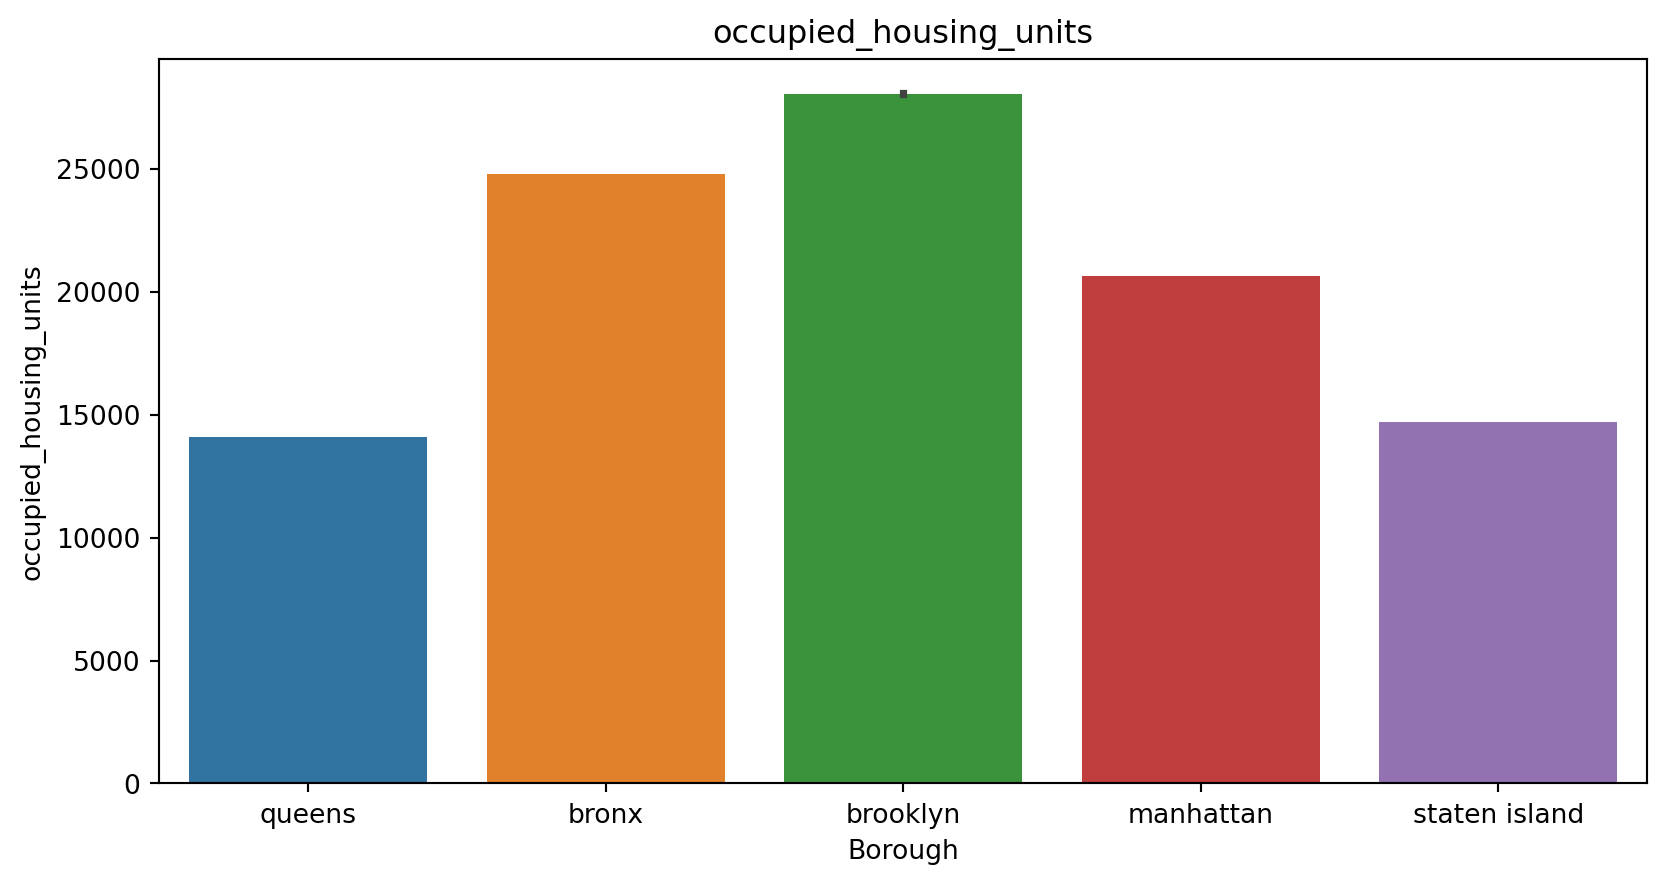

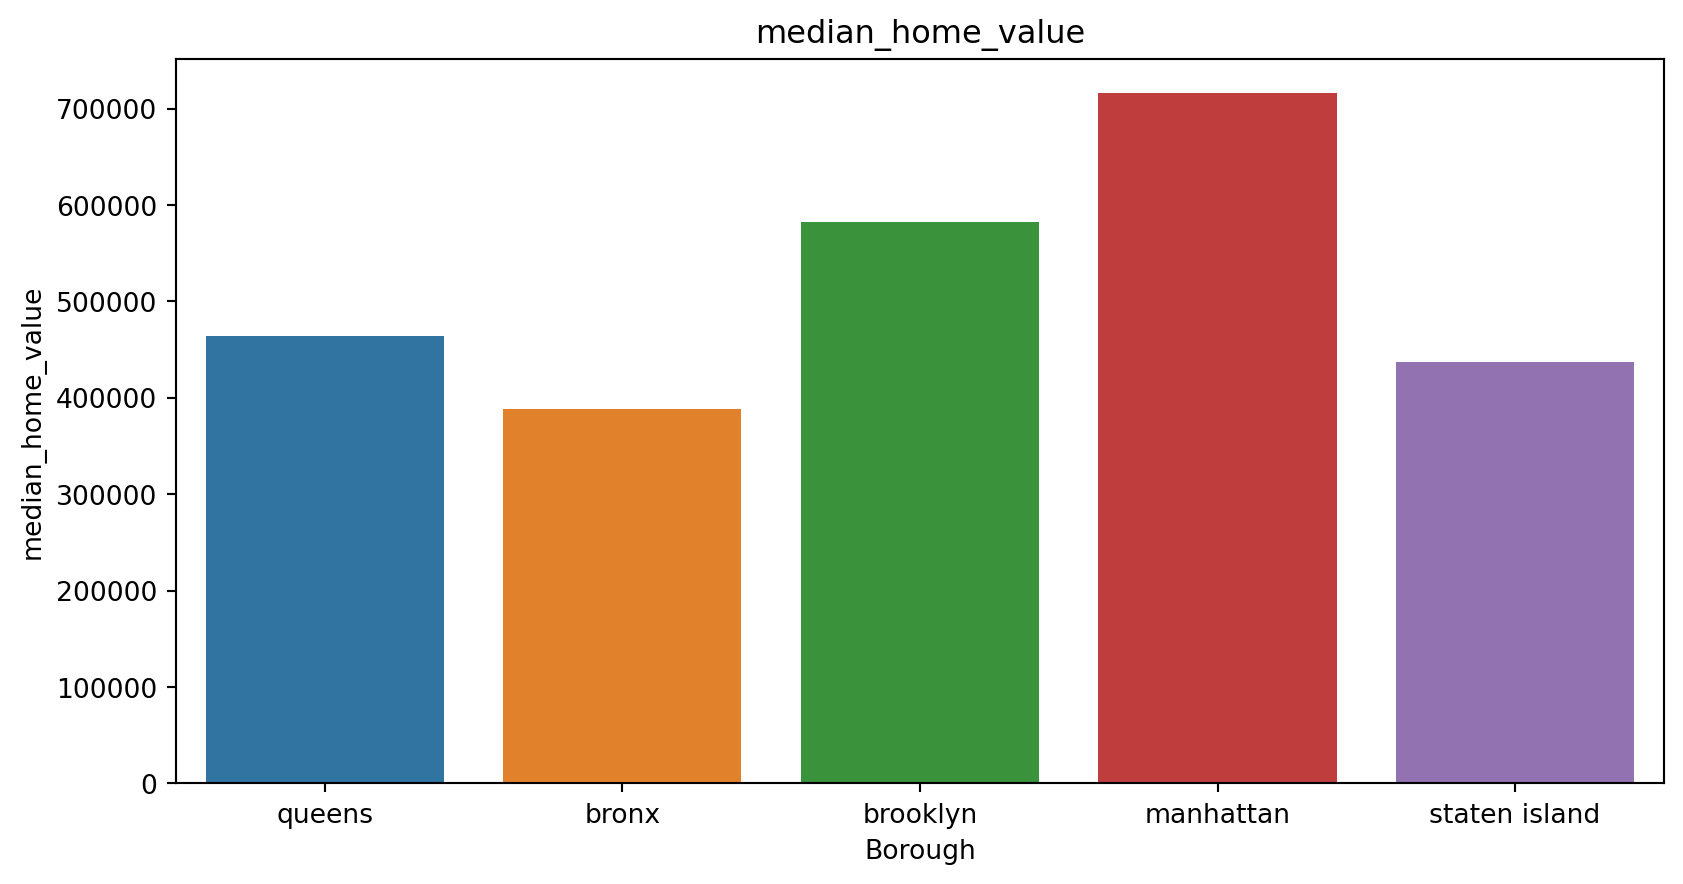

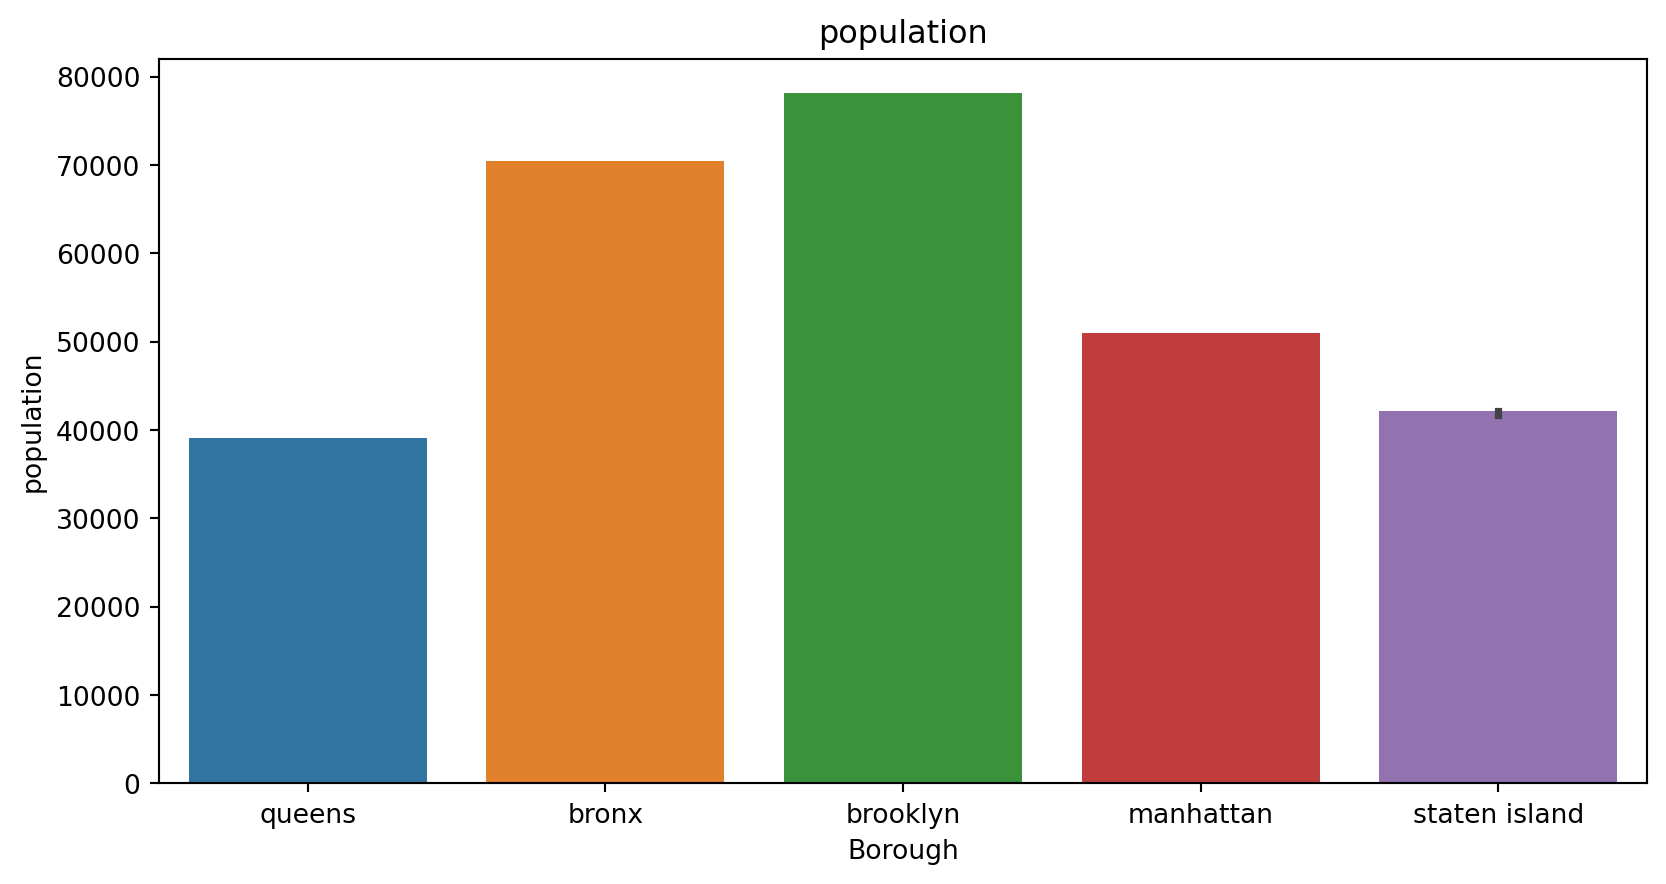

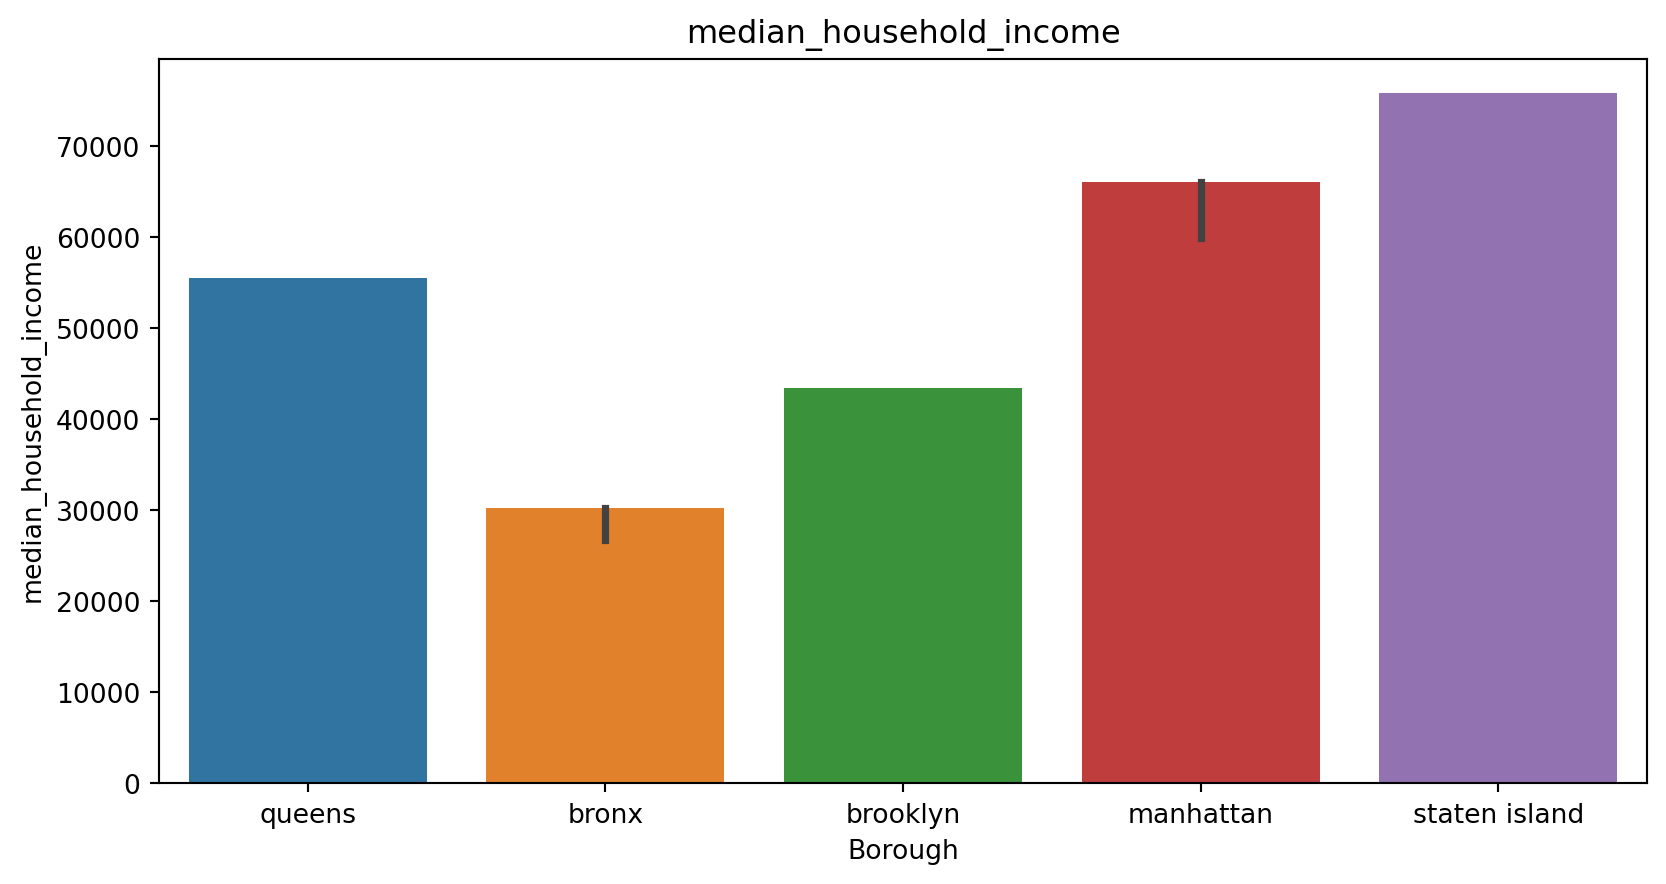

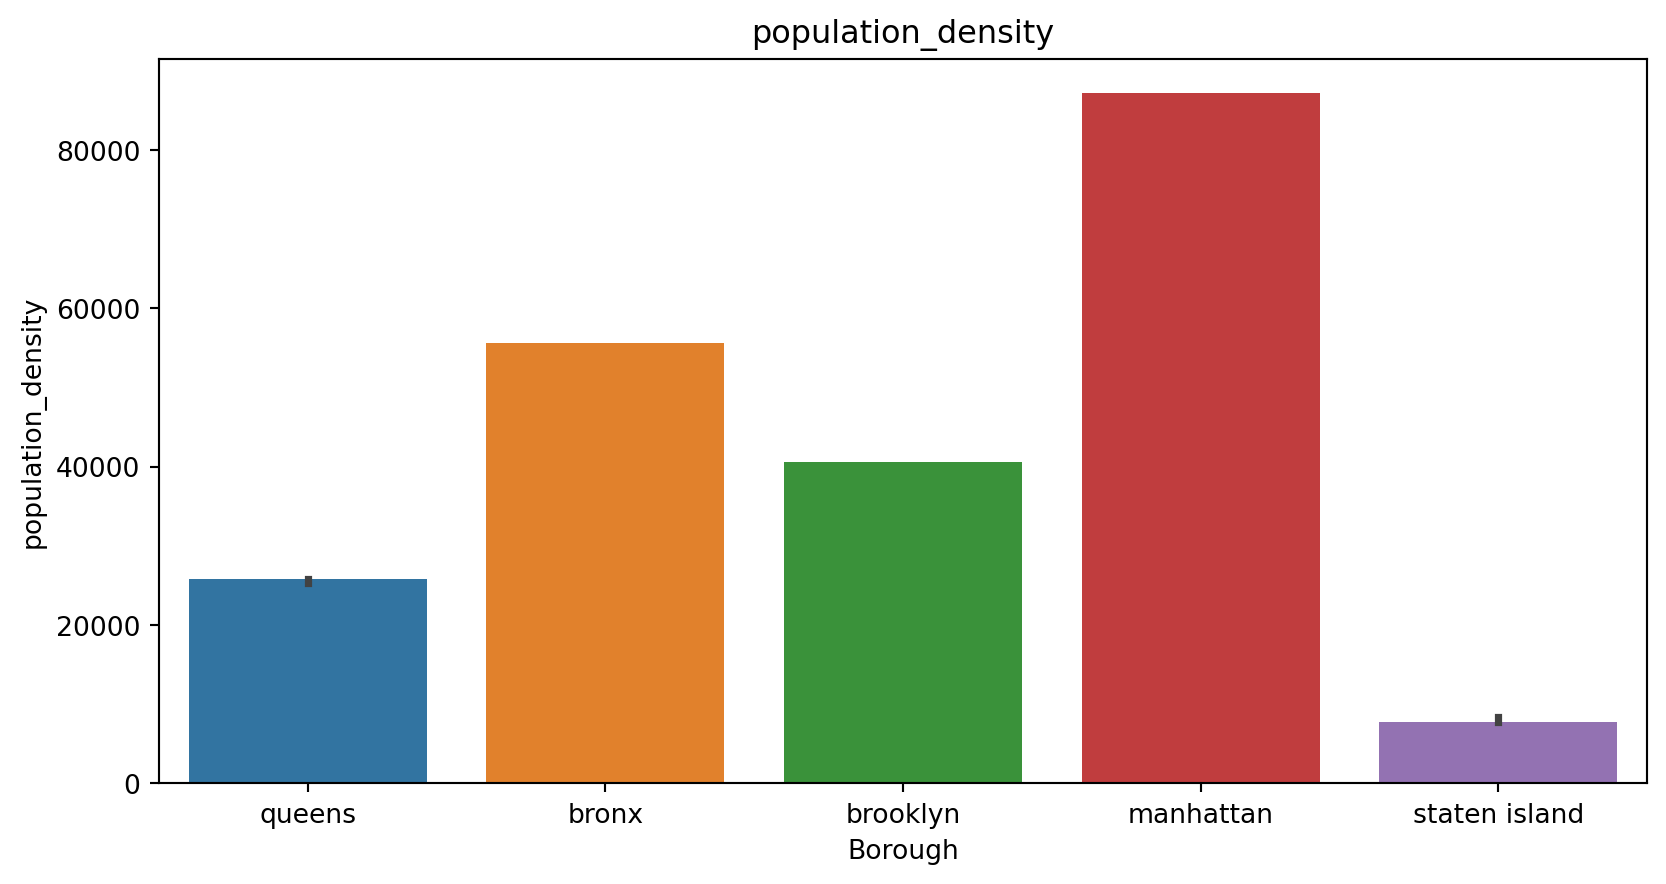

In [28]:
#| echo: false
#| eval: true

import numpy as np
import seaborn as sns

# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# drop any rows with missing values
demographics = demographics.dropna()

# create barplots for each demographic variable
for var in demographics.columns[:-1]:  # exclude the last column (Borough)
    sns.barplot(x='Borough', y=var, data=demographics, estimator=np.median)
    plt.title(var)
    plt.show()

In [29]:
#| echo: true
#| eval: false

# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# drop any rows with missing values
demographics = demographics.dropna()

# create scatterplots for pairs of demographic variables
sns.pairplot(demographics, hue='Borough')
plt.show()

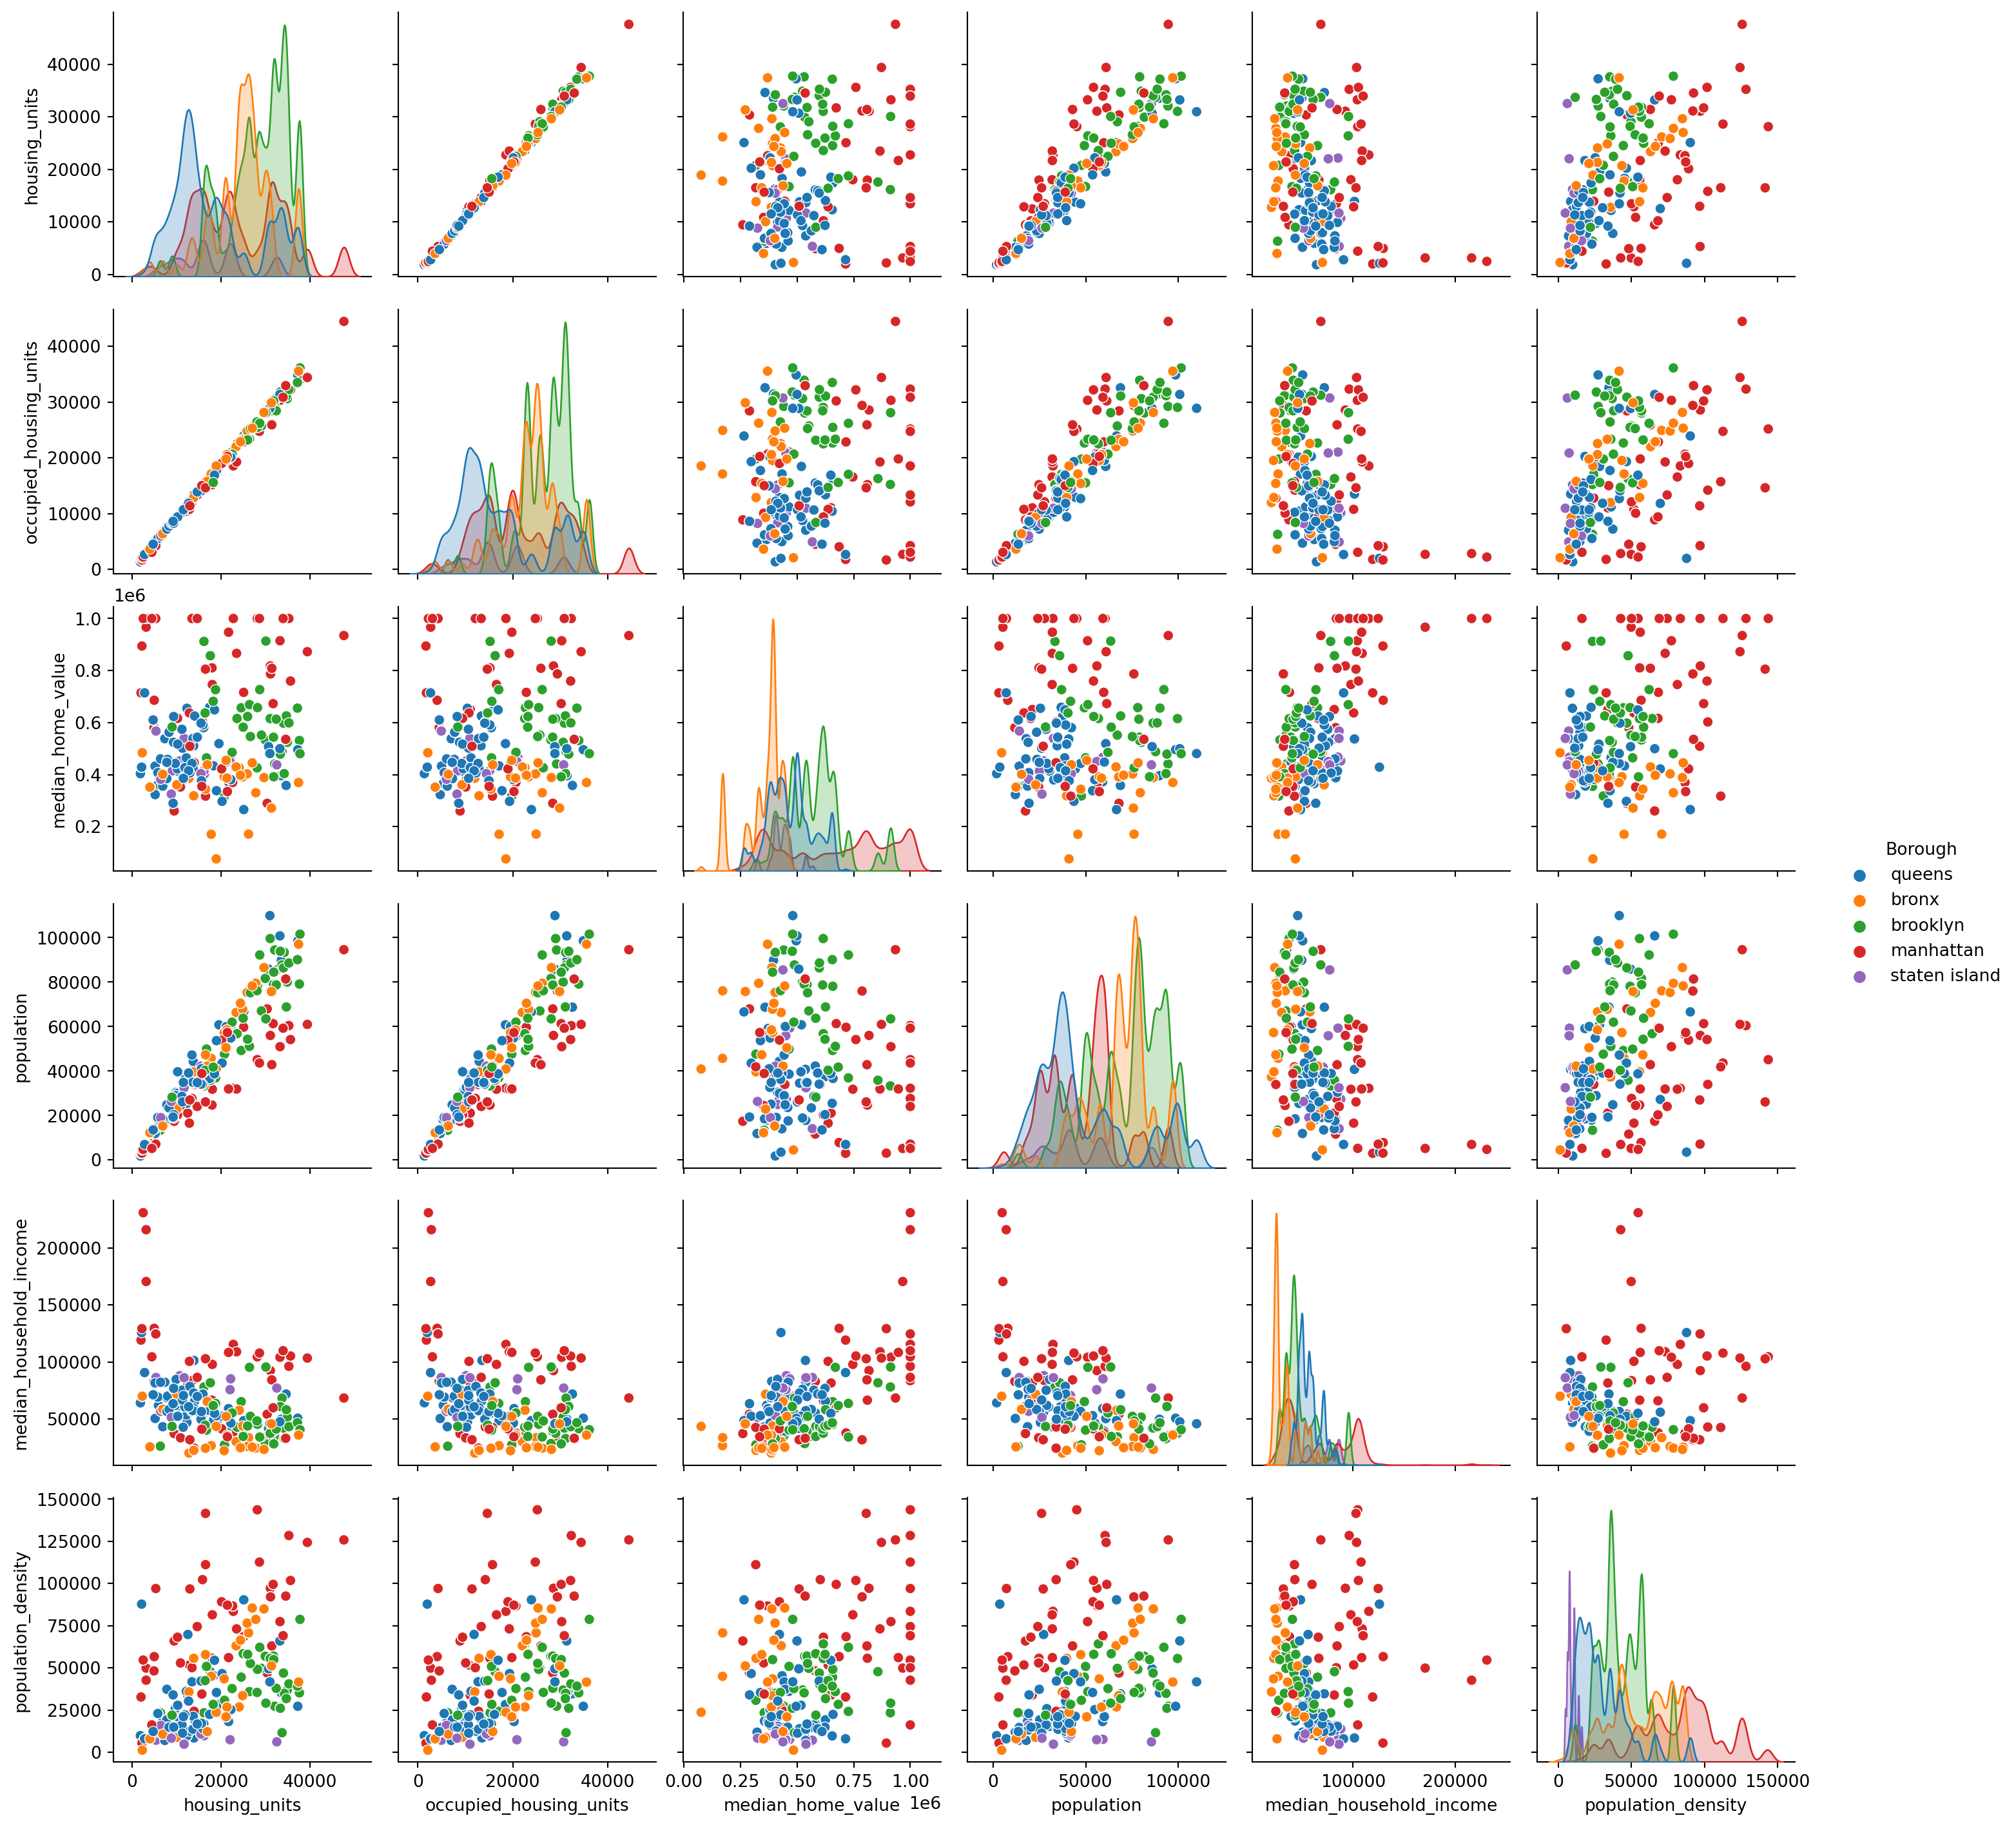

In [30]:
#| echo: false
#| eval: true

# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# drop any rows with missing values
demographics = demographics.dropna()

# create scatterplots for pairs of demographic variables
sns.pairplot(demographics, hue='Borough')
plt.show()

In [31]:
#| echo: true

from scipy.stats import kruskal

# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# drop any rows with missing values
demographics = demographics.dropna()

# group the data by borough
groups = demographics.groupby('Borough')

# conduct a Kruskal-Wallis test for each demographic variable
for var in demographics.columns[:-1]:  # exclude the last column (Borough)
    stat, pvalue = kruskal(*[group[var].values for name, group in groups])
    print(f'{var} - Kruskal-Wallis test statistic: {stat:.2f}, p-value: {pvalue:.4f}')

housing_units - Kruskal-Wallis test statistic: 42177.11, p-value: 0.0000
occupied_housing_units - Kruskal-Wallis test statistic: 37523.03, p-value: 0.0000
median_home_value - Kruskal-Wallis test statistic: 90843.89, p-value: 0.0000
population - Kruskal-Wallis test statistic: 45150.25, p-value: 0.0000
median_household_income - Kruskal-Wallis test statistic: 69218.13, p-value: 0.0000
population_density - Kruskal-Wallis test statistic: 105047.35, p-value: 0.0000


In [32]:
#| echo: true
#| eval: false

from scipy.stats import mannwhitneyu

# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# drop any rows with missing values
demographics = demographics.dropna()

# create a list of unique boroughs
boroughs = demographics['Borough'].unique()

# conduct pairwise Mann-Whitney U tests for each demographic variable
for var in demographics.columns[:-1]:  # exclude the last column (Borough)
    print(f'{var}:')
    for i in range(len(boroughs)):
        for j in range(i+1, len(boroughs)):
            borough1 = boroughs[i]
            borough2 = boroughs[j]
            group1 = demographics[demographics['Borough'] == borough1][var]
            group2 = demographics[demographics['Borough'] == borough2][var]
            stat, pvalue = mannwhitneyu(group1, group2)
            print(f'{borough1} vs {borough2} - Mann-Whitney U test statistic: {stat:.2f}, p-value: {pvalue:.4f}')

In [33]:
#| echo: false
#| eval: true

from scipy.stats import mannwhitneyu

# select the demographic variables and borough columns
demographics = df[['housing_units', 'occupied_housing_units', 'median_home_value', 'population', 'median_household_income', 'population_density', 'Borough']]

# drop any rows with missing values
demographics = demographics.dropna()

# create a list of unique boroughs
boroughs = demographics['Borough'].unique()

# conduct pairwise Mann-Whitney U tests for each demographic variable
for var in demographics.columns[:-1]:  # exclude the last column (Borough)
    print(f'{var}:')
    for i in range(len(boroughs)):
        for j in range(i+1, len(boroughs)):
            borough1 = boroughs[i]
            borough2 = boroughs[j]
            group1 = demographics[demographics['Borough'] == borough1][var]
            group2 = demographics[demographics['Borough'] == borough2][var]
            stat, pvalue = mannwhitneyu(group1, group2)
            print(f'{borough1} vs {borough2} - Mann-Whitney U test statistic: {stat:.2f}, p-value: {pvalue:.4f}')

housing_units:
queens vs bronx - Mann-Whitney U test statistic: 731930404.50, p-value: 0.0000


queens vs brooklyn - Mann-Whitney U test statistic: 755103568.00, p-value: 0.0000
queens vs manhattan - Mann-Whitney U test statistic: 747198576.00, p-value: 0.0000
queens vs staten island - Mann-Whitney U test statistic: 251991031.00, p-value: 0.0004


bronx vs brooklyn - Mann-Whitney U test statistic: 1122897825.00, p-value: 0.0000
bronx vs manhattan - Mann-Whitney U test statistic: 1186141617.00, p-value: 0.0000
bronx vs staten island - Mann-Whitney U test statistic: 375067428.00, p-value: 0.0000


brooklyn vs manhattan - Mann-Whitney U test statistic: 2069928887.00, p-value: 0.0000
brooklyn vs staten island - Mann-Whitney U test statistic: 590612815.00, p-value: 0.0000
manhattan vs staten island - Mann-Whitney U test statistic: 311645199.00, p-value: 0.0000
occupied_housing_units:


queens vs bronx - Mann-Whitney U test statistic: 726109951.50, p-value: 0.0000
queens vs brooklyn - Mann-Whitney U test statistic: 833463835.00, p-value: 0.0000
queens vs manhattan - Mann-Whitney U test statistic: 792458317.00, p-value: 0.0000


queens vs staten island - Mann-Whitney U test statistic: 250727076.00, p-value: 0.0000
bronx vs brooklyn - Mann-Whitney U test statistic: 1227470623.00, p-value: 0.0000
bronx vs manhattan - Mann-Whitney U test statistic: 1268096410.00, p-value: 0.0000


bronx vs staten island - Mann-Whitney U test statistic: 375067428.00, p-value: 0.0000
brooklyn vs manhattan - Mann-Whitney U test statistic: 2083303980.00, p-value: 0.0000
brooklyn vs staten island - Mann-Whitney U test statistic: 585318924.00, p-value: 0.0000


manhattan vs staten island - Mann-Whitney U test statistic: 299269839.00, p-value: 0.0000
median_home_value:
queens vs bronx - Mann-Whitney U test statistic: 2064439322.50, p-value: 0.0000


queens vs brooklyn - Mann-Whitney U test statistic: 945418122.00, p-value: 0.0000
queens vs manhattan - Mann-Whitney U test statistic: 613637457.00, p-value: 0.0000
queens vs staten island - Mann-Whitney U test statistic: 310713311.50, p-value: 0.0000


bronx vs brooklyn - Mann-Whitney U test statistic: 168068554.00, p-value: 0.0000
bronx vs manhattan - Mann-Whitney U test statistic: 332506132.00, p-value: 0.0000
bronx vs staten island - Mann-Whitney U test statistic: 87175131.00, p-value: 0.0000


brooklyn vs manhattan - Mann-Whitney U test statistic: 1173982284.00, p-value: 0.0000
brooklyn vs staten island - Mann-Whitney U test statistic: 608329494.00, p-value: 0.0000
manhattan vs staten island - Mann-Whitney U test statistic: 348695906.00, p-value: 0.0000
population:


queens vs bronx - Mann-Whitney U test statistic: 723349458.50, p-value: 0.0000
queens vs brooklyn - Mann-Whitney U test statistic: 954489503.00, p-value: 0.0000
queens vs manhattan - Mann-Whitney U test statistic: 1147044721.00, p-value: 0.0000


queens vs staten island - Mann-Whitney U test statistic: 254140059.00, p-value: 0.0258
bronx vs brooklyn - Mann-Whitney U test statistic: 1493402640.00, p-value: 0.0000


bronx vs manhattan - Mann-Whitney U test statistic: 1756057181.00, p-value: 0.0000
bronx vs staten island - Mann-Whitney U test statistic: 382039625.00, p-value: 0.0000
brooklyn vs manhattan - Mann-Whitney U test statistic: 2519557512.00, p-value: 0.0000


brooklyn vs staten island - Mann-Whitney U test statistic: 555876501.00, p-value: 0.0000
manhattan vs staten island - Mann-Whitney U test statistic: 241420020.00, p-value: 0.0000
median_household_income:
queens vs bronx - Mann-Whitney U test statistic: 2295827795.50, p-value: 0.0000


queens vs brooklyn - Mann-Whitney U test statistic: 2604867150.00, p-value: 0.0000
queens vs manhattan - Mann-Whitney U test statistic: 1154096515.00, p-value: 0.0000
queens vs staten island - Mann-Whitney U test statistic: 102584535.00, p-value: 0.0000


bronx vs brooklyn - Mann-Whitney U test statistic: 772870977.00, p-value: 0.0000
bronx vs manhattan - Mann-Whitney U test statistic: 403590044.00, p-value: 0.0000
bronx vs staten island - Mann-Whitney U test statistic: 20247284.00, p-value: 0.0000


brooklyn vs manhattan - Mann-Whitney U test statistic: 1240799251.00, p-value: 0.0000
brooklyn vs staten island - Mann-Whitney U test statistic: 113403575.00, p-value: 0.0000
manhattan vs staten island - Mann-Whitney U test statistic: 198515880.00, p-value: 0.0000
population_density:


queens vs bronx - Mann-Whitney U test statistic: 533977934.50, p-value: 0.0000
queens vs brooklyn - Mann-Whitney U test statistic: 883050586.00, p-value: 0.0000


queens vs manhattan - Mann-Whitney U test statistic: 172458865.00, p-value: 0.0000
queens vs staten island - Mann-Whitney U test statistic: 495109896.00, p-value: 0.0000
bronx vs brooklyn - Mann-Whitney U test statistic: 2307955947.00, p-value: 0.0000


bronx vs manhattan - Mann-Whitney U test statistic: 484072824.00, p-value: 0.0000
bronx vs staten island - Mann-Whitney U test statistic: 486192023.00, p-value: 0.0000
brooklyn vs manhattan - Mann-Whitney U test statistic: 414238766.00, p-value: 0.0000


brooklyn vs staten island - Mann-Whitney U test statistic: 701914224.00, p-value: 0.0000
manhattan vs staten island - Mann-Whitney U test statistic: 456165547.00, p-value: 0.0000
